Morsejeva abeceda omogoča pošiljanje besedila s pomočjo različnih dolžin piskov, svetlobnih signalov ali, morda tudi z dimnimi signali. Črko V, na primer, sporočimo s tremi kratkimi in enim dolgim signalom, kar bi lahko zapisali tako "- - - ---"; dolgi signal je namreč približno trikrat daljši od kratkega. Med posameznimi signali je presledek. Da ločimo črke med sabo, naredimo med posameznimi črkami trikrat daljši presledek. Da ločimo dve besedi, naredimo še daljši premor, recimo šest presledkov. Tole bi lahko bil primer sporočila:

```text
- - - ---   - - -   --- --- --- - ---      - - --- -   - --- -   - -      - - ---   - --- - -
```

Takšnega zapisa v resnici ne uporabljamo; običajno bi kratki znak opisali s piko in daljšega s črtico. Črko V bi torej opisali z "...-". Presledkov znotraj črke ne pišemo. Pač pa bomo med dvema črkama naredili en presledek, med dvema besedama pa po tri. Gornji signal bi torej zapisali tako:

```text
...- ... ---.-   ..-. .-. ..   ..- .-..
```

Prva črka gornjega zapisa je, vemo, V. Naprej gre tako:

```text
VSŠ FRI UL
```

V tem zapisu seveda ni presledkov med črkami, pač pa imamo en presledek med besedami.

## Obvezni del

Napiši naslednje funkcije.

### 1. `v_zaporedje(signal)`

Funkcija `v_zaporedje(signal)` prejme signal v prvi obliki in vrne zaporedje v drugi obliki.

#### Rešitev

Kako se lotiti, najlepše pokaže tale izdelek ene od študentk.

In [1]:
def v_zaporedje(signal):
    signal = signal.replace("---", "dolgi")
    signal = signal.replace("-", ".")
    signal = signal.replace("      ", "dolgi_presledek")
    signal = signal.replace("   ", "kratek_presledek")
    signal = signal.replace(" ", "")
    signal = signal.replace("dolgi_presledek", "   ")
    signal = signal.replace("kratek_presledek", " ")
    signal = signal.replace("dolgi", "-")
    return signal

Komentar najbrž ni potreben.

Opozoriti je morda potrebno le na tole: odkar vemo za funkcije, ponavljam, da funkcija ne sme spreminjati vrednosti argumentov. Ta funkcija tega ne počne. Funkcija ne spremeni niza, ki ga je dobila kot argument, temveč sestavi (z `replace`) nov niz in za ta niz poslej (interno, znotraj funkcije) uporablja enako ime, kot ga je v začetku uporabljala za niz, ki ga je prejela kot argument.

Sam bi tole sicer naredil z zanko:

In [2]:
def v_zaporedje(signal):
    for kaj, s_cim in (("---", "X"), ("-", "."),  ("X", "-"),
                       ("   ", "Y"),(" ", ""),
                       ("YY", "   "), ("Y", " "), ("X", "   ")):
        signal = signal.replace(kaj, s_cim)
    return signal

Gre z manj `replace`-i? Gre. Nek študent je odkril rešitev s sedmimi in nekdo s šestimi - ideja je v tem, da najprej zamenjamo `-` s `.`, potem pa `...` z `-`. Rekorder pa je tale s štirimi:

In [16]:
def v_zaporedje(signal):
    signal = signal.replace("-",".")
    signal = (signal + " ").replace("... ", "-")
    signal = signal.replace(". ", ".")
    signal = signal.replace("  ", " ")
    return signal

Prvi zamenja vse minuse s pikami. Drugi zamenja tri pike s črtico, mimogrede pa odstrani še presledek za njo. Tretji odstrani presledek za piko.

Tako smo uredili pike in črtice, mimogrede pa odstranili presledke med njimi. Stranski učinek odstranjevanja presledkov je, da se trojni presledki zamenjajo z dvojnimi, šesterni pa s peternimi. Zadnji `replace` potem zamenja dvojne presledke z enojnimi, peterni pa postanejo trojni (ker se po dva para zamenjata z enim).

Presledek, ki ga pripnemo na konec niza, poskrbi za nize, ki se končajo s "...", katerih `replace("... " , "-")` ne bi zgrabil. Odstranjen bo v tej vrstici ali pa v naslednji.

Briljantno. Deluje sicer samo zato, ker sem ravno posrečeno izbral število presledkov v nalogi. Ampak vseeno briljantno.

Precej študentov je namesto z `replace` reševalo z zankami s kupom `if`-ov in pogledom naprej in tako naprej. To je precej zapleteno, se pa da. Če hočeš narediti sistematično, je potrebno uporabiti primerni formalizem. En, ki se kar ponuja, so *končni avtomati*. To ni stvar tega predmeta, je pa zanimivo (vsaj za tiste, ki o njih slišite pri kakem drugem predmetu), zato sem rešitev z njimi opisal na dnu te strani.

### 2. `vrni_znak(zaporedje, abeceda, morse)`

Funkcija `vrni_znak(zaporedje, abeceda, morse)` prejme niz z nekim zaporedjem v drugi obliki, na primer, `"...-"`, niz, ki vsebuje vse črke abecede, na primer `"ABCČDEFGHIJKLMNOPRSŠTUVZŽ"` in seznam z Morsejevo abecedo: n-ti element seznama predstavlja zapis n-te črke abecede. Funkcija mora vrniti znak, ki ga predstavlja zaporedje - v gornjem primeru `"V"`.

#### Rešitev

Ta naloga služi kot primer legalne uporabe metode `index`: v Morsejevi abecedi moramo poiskati podano zaporedje in vrniti element z istim indeksom v podani abecedi. Iskanje je nujno, vsak znak se pojavi le enkrat, indeksa ne vemo vnaprej (za razliko od situacije, v kateri gremo z zanko čez seznam in za vsak element lahko vemo tudi njegov indeks).

In [4]:
def vrni_znak(zaporedje, abeceda, morse):
    return abeceda[morse.index(zaporedje)]

Zanimivo je, kako se da reč rešiti s slovarji. Takšna rešitev je počasnejša, ker je potrebno sestavljati slovar. Bila pa bi bistveno hitrejša od rešitve z indeksi, če bi si slovar sestavili enkrat za vedno.

In [5]:
def vrni_znak(zaporedje, abeceda, morse):
    return dict(zip(morse, abeceda))[zaporedje]

Morsejevo in navadno abecedo zazipamo v seznam parov, ki jih `dict` uporabi kot ključe in vrednosti.

### 3. `v_besedo(zaporedje, abeceda, morse)`

Funkcija `v_besedo(zaporedje, abeceda, morse)` prejme posamično besedo v drugi obliki in vrne besedo, zapisano z običajnimi črkami. Če funkcijo pokličemo z `"...- ... ---.-"` (in ustrezno definiranama abecedama), vrne niz `"VSŠ"`. 

Funkcija prejme le eno besedo, brez trojnih presledkov.

#### Rešitev

Zaporedje z najobičajnejšim `split` razdelimo glede na presledke. Dobljene podnize podajamo prejšnji funkciji in zlagamo rezultate v niz.

In [6]:
def v_besedo(zaporedje, abeceda, morse):
    znaki = ""
    for dolzine in zaporedje.split():
        znaki += vrni_znak(dolzine, abeceda, morse)
    return znaki

### 4. `v_znake(zaporedje, abeceda, morse)`

Funkcija `v_znake(zaporedje, abeceda, morse)` prejme niz z zaporedjem v drugi obliki, vendar lahko vsebuje več besed. Če dobi kot argument celotno vrstico

```
...- ... ---.-   ..-. .-. ..   ..- .-..
```

vrne celotno tretjo, `"VSŠ FRI UL"`.

#### Rešitev

Tu pa je potrebno razdeliti niz glede na trojne presledke, da dobimo besede. Za vsako besedo pokličemo prejšnjo funkcijo. Rezultate zlagamo v seznam. Nize iz tega seznama na koncu združimo tako, da mednje postavimo presledke.

In [7]:
def v_znake(zaporedje, abeceda, morse):
    besede = []
    for podzaporedje in zaporedje.split("   "):
        besede.append(v_besedo(podzaporedje, abeceda, morse))
    return " ".join(besede)

### 5. `preberi(signal, abeceda, morse)`

Funkcija `preberi(signal, abeceda, morse)` prejme signal, kot ga opisuje prva vrstica in vrne besedilo, kot je v tretji.

#### Rešitev

In [8]:
def preberi(signal, abeceda, morse):
    return v_znake(v_zaporedje(signal), abeceda, morse)

## Dodatna naloga

Tole je težje samo zato, ker se morate zorganizirati sami: pišite si poljubne dodatne funkcije, ki vam utegnejo pomagati.

Napiši funkcijo `zapisi(besedilo, abeceda, morse)`, ki prejme besedilo in vrne signal. Se pravi, dobi niz, kot ga imamo v tretji vrstici, in vrne takšnega, kot je v prvi.

#### Rešitev

Rešitev bi se dalo napisati v eni sami funkciji. Sam sem raje napisal tri, da je pregledneje.

In [9]:
def crka_v_zaporedje(crka, abeceda, morse):
    return " ".join(morse[abeceda.index(crka)]).replace("-", "---").replace(".", "-")

def besedo_v_zaporedje(beseda, abeceda, morse):
    zaporedje = []
    for crka in beseda:
        zaporedje.append(crka_v_zaporedje(crka, abeceda, morse))
    return "   ".join(zaporedje)

def zapisi(besedilo, abeceda, morse):
    zaporedje = []
    for beseda in besedilo.split():
        zaporedje.append(besedo_v_zaporedje(beseda, abeceda, morse))
    return "      ".join(zaporedje)

## Funkcija `v_zaporedje` s končnim avtomatom

Funkcijo `v_zaporedje` je mogoče lepo rešiti tudi z Moorovim avtomatom. (Ali z Mealyjevim, vendar so mi bili Moorovi že kot študentu bolj pri srcu.)

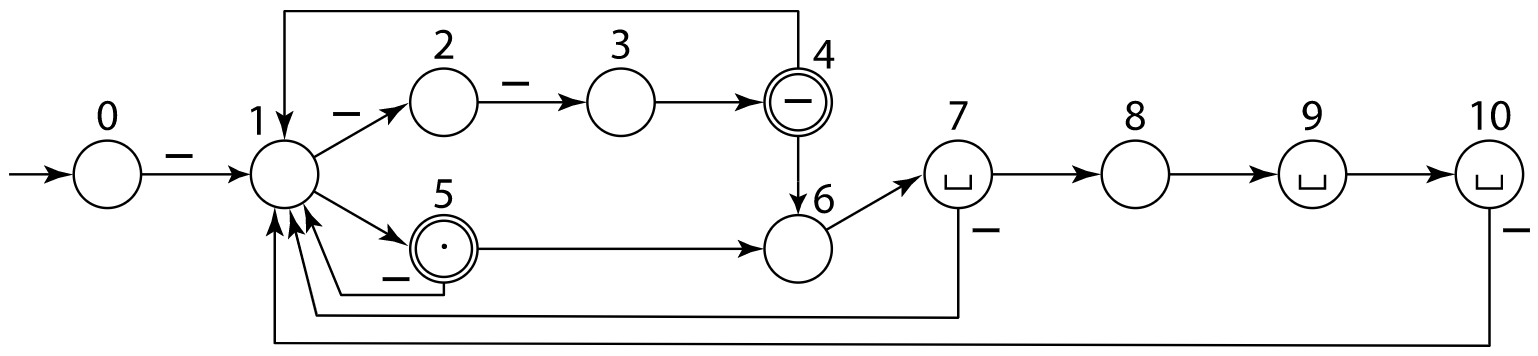

Vhodna abeceda ima dva simbola, `-` in presledek. Ker je presledek neviden, se ga na povezavah ne vidi. :) (Torej: prazne povezave pomenijo prehode, ko avtomat prejme presledek.)

Avtomat izpiše črtico v stanju 4, piko v stanju 5 ter presledek v stanjih 7, 9 in 10.

Začetno stanje je 0, končni sta 4 in 5 (kar niti ni pomembno).

Stanja so oštevilčena, da bomo lažje sledili programu,

Logika je preprosta.

- Vhod se vedno začne s črtico.
- Stanja 1 ustreza eni prejeti črtici. Če sledi presledek, gremo v stanje 5, kjer izpišemo piko; če sledi še ena črtica, gremo v stanje 2, nato v 3 in 4 -- slediti morata še dve črtici in presledek. V stanju 4 izpišemo črtico.
- Stanji 4 in 5 sta si nekako ekvivalentni: v obeh smo izpisali piko ali črtico po tem, ko smo prejeli presledek. Zdaj čakamo, kaj sledi: če sledi črtica, nadaljujemo v stanjem 1 (to je: imamo le en presledek, znak se nadaljuje). Sicer pa je konec znaka; sledili bodo trije presledki ali šest presledkov.
- V stanjih 6 in 7 sprejmemo dva presledka in izpišemo en presledek; sledi lahko črtica (naslednja črka besede) ali pa še trije presledki. Če sledi črtica, gremo nazaj v 1.
- V stranjih 8, 9, in 10 polovimo še preostale tri presledke; skupaj jih je bilo 6, torej izpišemo še 2. V stanju 10 mora slediti črtica, ki nas vrne v stanje 1.

Avtomat ima težave s čisto zadnjo črtico, ki ji ne sledi presledek. To uredimo preprosto tako, da bomo k vhodnemu nizu dodali presledek. Tej "goljufiji" bi se lahko izognili tako, da bi iz stanj 1 in 4 dodali prazen prehod v brezizhodni končni stanji, ki bi izpisali črtico oz. presledek.

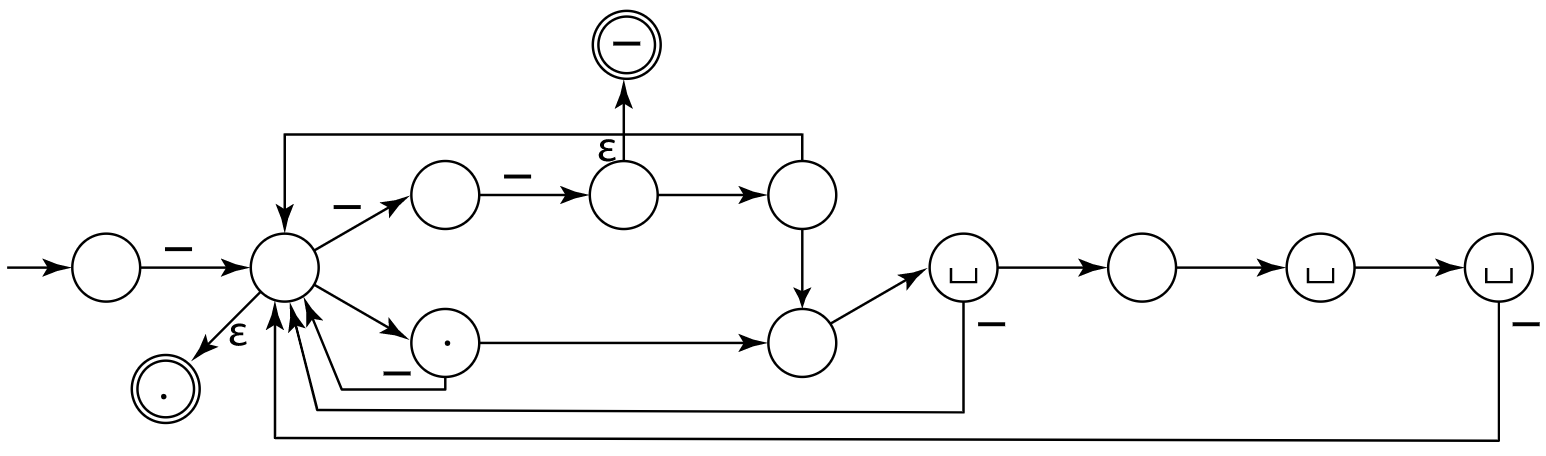

Ta avtomat je nedeterminističen in ga je bistveno težje sprogramirati. Zato bomo ostali pri prvem in pragmatično prilepili presledek na konec vhoda.

Funkcija `v_zaporedje` je potem takšna.

In [12]:
def v_zaporedje(signal):
    prehodi = {0: (None, 1), 1: (5, 2), 2: (None, 3), 3: (4, None),
               4: (6, 1), 5: (6, 1), 6: (7, None), 7: (8, 1),
               8: (9, None), 9: (10, None), 10: (None, 1)}
    izhodi = {4: "-", 5: ".", 7: " ", 9: " ", 10: " "}

    stanje = 0
    izpis = ""
    for c in signal + " ":
        stanje = prehodi[stanje][c == "-"]
        izpis += izhodi.get(stanje, "")
    return izpis

Prehode smo definirali s slovarjem: ključi so stanja, vrednosti pa terke. Prvi element terke pove naslednje stanje, kadar je na vhodu presledek, drugi pa, kadar imamo črtico. Ilegalni prehodi so označeni z `None`. Funkcija bo v tem primeru javila napako; kriv je, kdor jo pokliče z ilegalnim vhodom.

V slovarju `izhodi` je zapisano, katera stanja izpišejo kateri znak.

Sledi simulator končnega avtomata. Ta je trivialen, ker so končni avtomati pač trivialne stvari.

S tem, ali avtomat sprejme vhod ali ne, se ne ukvarjamo. Spet: kdor ga pokliče z ilegalnim vhodom, je sam kriv za čuden izhod.

Simulator je preprost tudi zato, ker smo dejansko programiranje opravili, ko smo sestavljali končni avtomat.

Takšna pa bi bila rešitev z Mealyjevim avtomatom. Dolžina je podobna, stanj je manj (vendar je zato izhodov v bistvu dvakrat toliko, saj so na prehodih in ne na stanjih).

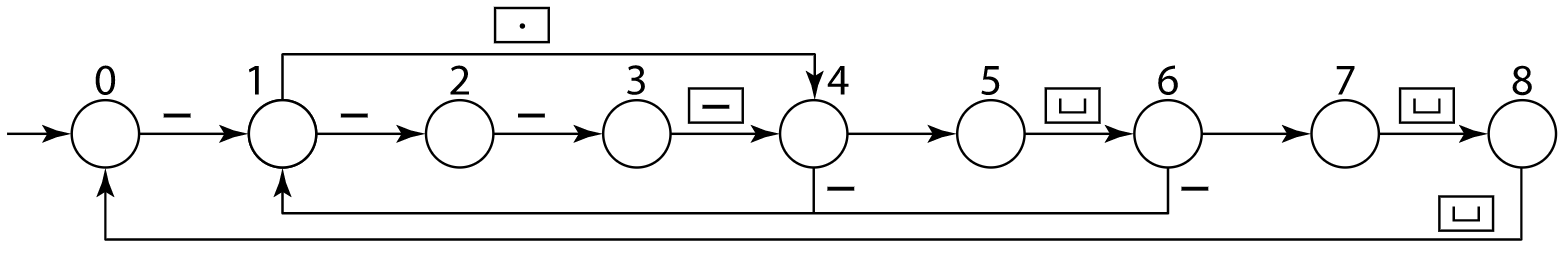

Prazne povezave spet pomenijo prehode, ko je na vhodu presledek. Simboli v okvirčkih pomenijo izhode. (Ti so, slučajno, vedno natančno takrat, ko je na vhodu presledek).

In [14]:
def v_zaporedje(signal):
    prehodi = {0: (None, (1, "")), 1: ((4, "."), (2, "")), 2: (None, (3, "")),
               3: ((4, "-"), None), 4: ((5, ""), (1, "")), 5: ((6, " "), None),
               6: ((7, ""), (1, "")), 7: ((8, " "), None), 8: ((0, " "), None)}

    stanje = 0
    izpis = ""
    for c in signal + " ":
        stanje, izhod = prehodi[stanje][c == "-"]
        izpis += izhod
    return izpis